In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cmap

In [5]:
def slices(array, n):
    data = []
    for i in range(0,100,n):
        slice = array[:,:, i:i+n].sum(axis=2)//n
        data.append(slice)
    return data


In [15]:
def getFileNames(fileCount):
    data = []
    for i in range(1, fileCount+1):
        name = "Data\\QRAINf0" + str(i)+ ".bin";
        data.append(name)
    return data

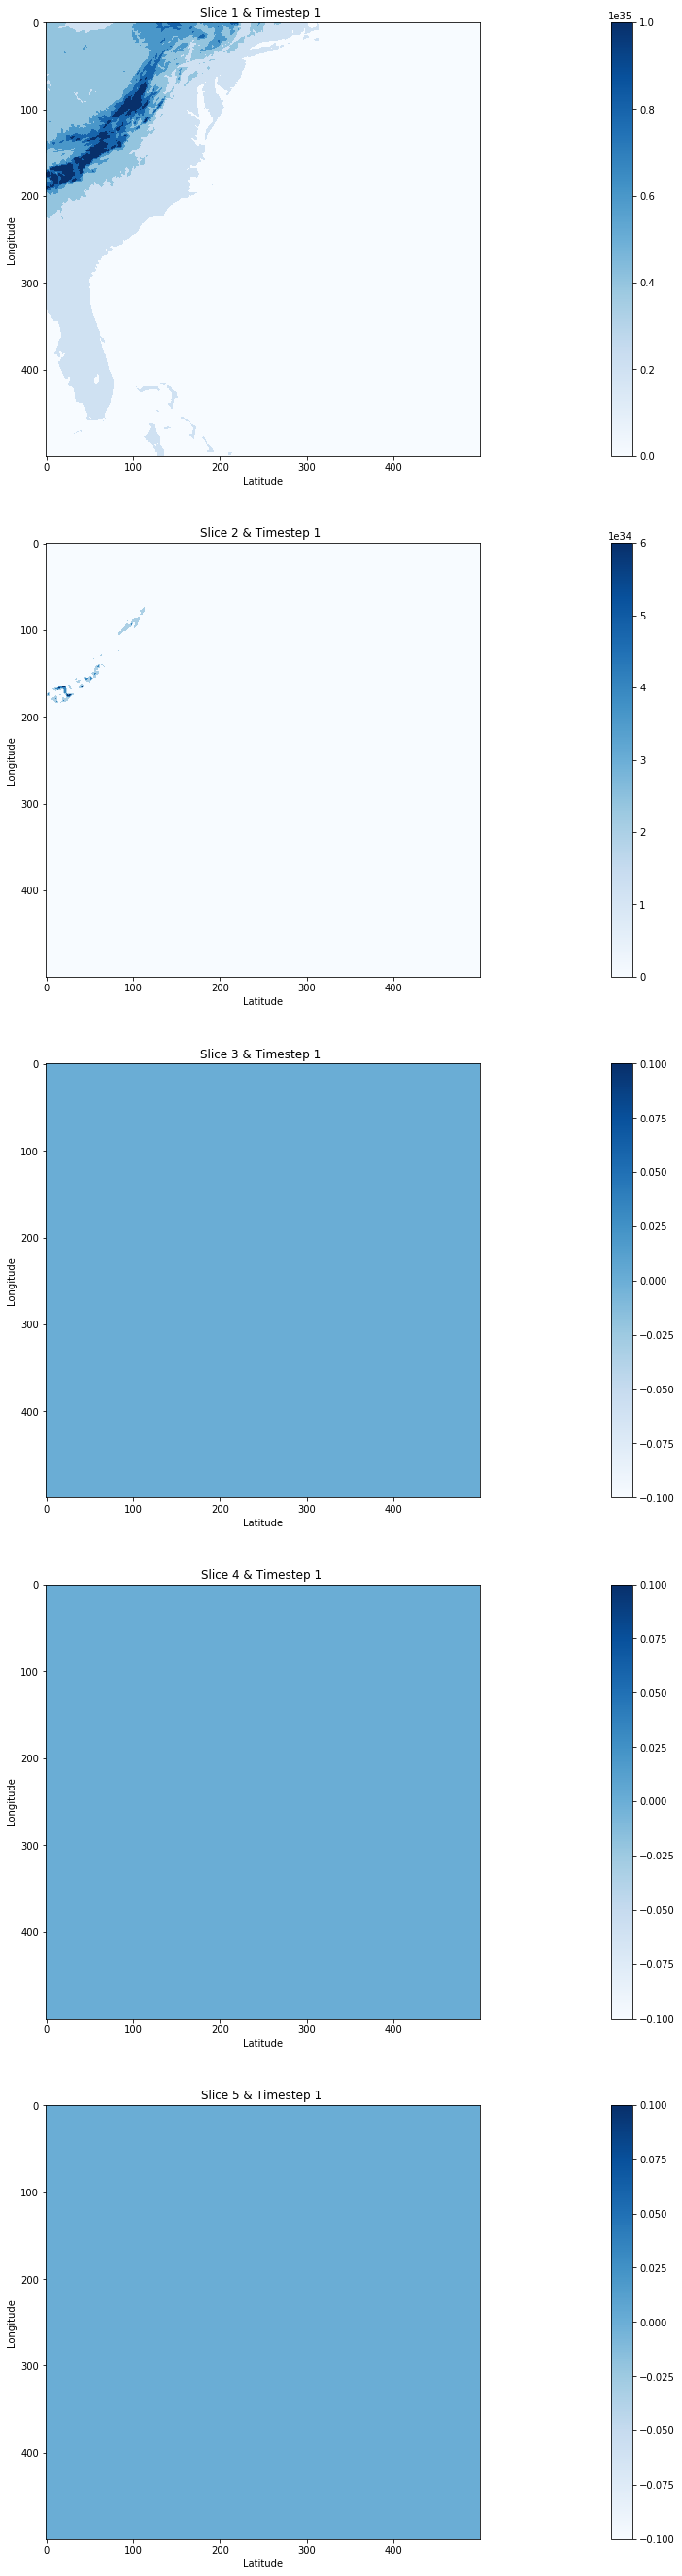

In [21]:
numFiles = 1
files = getFileNames(numFiles)
timestep = 1
n = 5
rows = 100//n
for i in files:
        with open(i,"rb") as f:
            arr = np.fromfile(f, dtype='>f')
            arr = np.reshape(arr, (500,500,100), order="F")
        data = slices(arr, n)
        fig=plt.figure(figsize=(20, 20))
        fig.subplots_adjust(bottom=0.2, right = 2, top = 2)
        for j in range(0, 5):
            fig.add_subplot(5, 1, j+1)
            plt.imshow(data[j],cmap = cmap.Blues,vmin=data[j].min(),vmax=data[j].max())
            plt.title("Slice %s & Timestep %s "%(j+1, timestep))
            plt.xlabel("Latitude")
            plt.ylabel("Longitude")
            plt.colorbar()
        timestep += 1

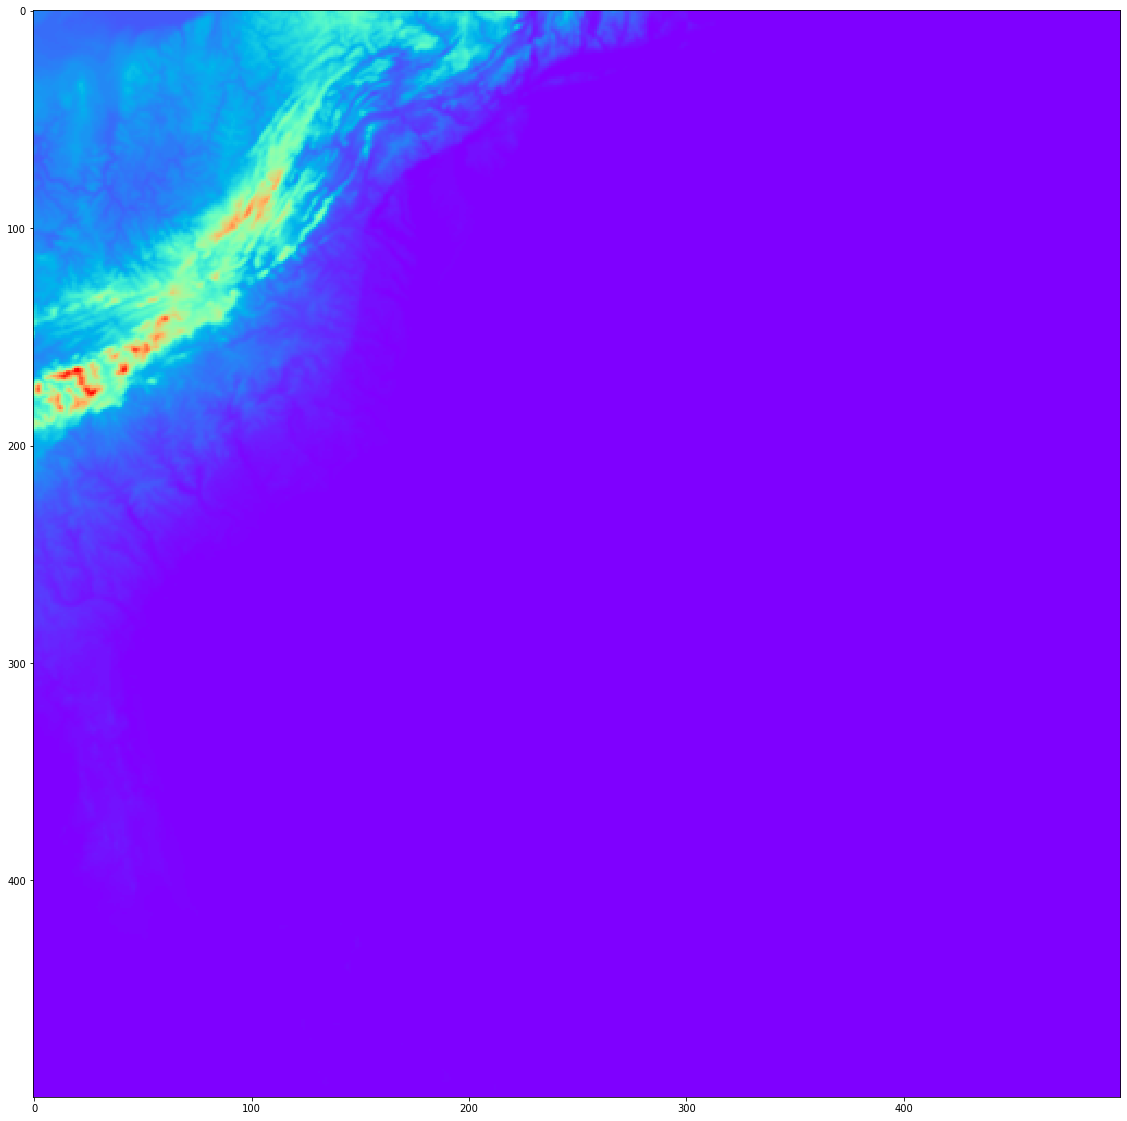

In [26]:
with open("Data\\HGTdata.bin", "rb") as f:
    arr = np.fromfile(f, dtype='>f')
    arr = np.reshape(arr, (500, 500), order = "F")
    fig = plt.figure(figsize=(20, 20))
    # plt.imshow(arr ,cmap = cmap.Blues, vmin=arr.min(),vmax=arr.max())
    plt.imshow(arr ,cmap = cmap.rainbow)